# Exploratory Data Analysis

### Import Libraries

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_summary import DataFrameSummary
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [4]:
# Check for missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [5]:
# Check for duplicates
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [15]:
df_numeric = df.select_dtypes(include=['number'])
dfs = DataFrameSummary(df_numeric)
dfs.summary()



,math_score,reading_score,writing_score
count,1000.0,1000.0,1000.0
mean,66.089,69.169,68.054
std,15.16308,14.600192,15.195657
min,0.0,17.0,10.0
25%,57.0,59.0,57.75
50%,66.0,70.0,69.0
75%,77.0,79.0,79.0
max,100.0,100.0,100.0
counts,1000,1000,1000
uniques,81,72,77


In [36]:
df_categorical = df.select_dtypes(include=['object', 'category'])
cat_stats = pd.DataFrame()
for col in df_categorical.columns:
    cat_stats[col] = [df_categorical[col].nunique(), df_categorical[col].value_counts().index[0], df_categorical[col].isnull().sum(), df_categorical[col].isnull().sum()/len(df_categorical)*100]
cat_stats = cat_stats.T
cat_stats.columns = ['Unique Values', 'Frequest_Value','Missing Values', 'Missing Percentage']
cat_stats
    


,Unique Values,Frequest_Value,Missing Values,Missing Percentage
gender,2,female,0,0.0
race_ethnicity,5,group C,0,0.0
parental_level_of_education,6,some college,0,0.0
lunch,2,standard,0,0.0
test_preparation_course,2,none,0,0.0


In [39]:
categorical_cols = df_categorical.columns
numerical_cols = df_numeric.columns

In [41]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3


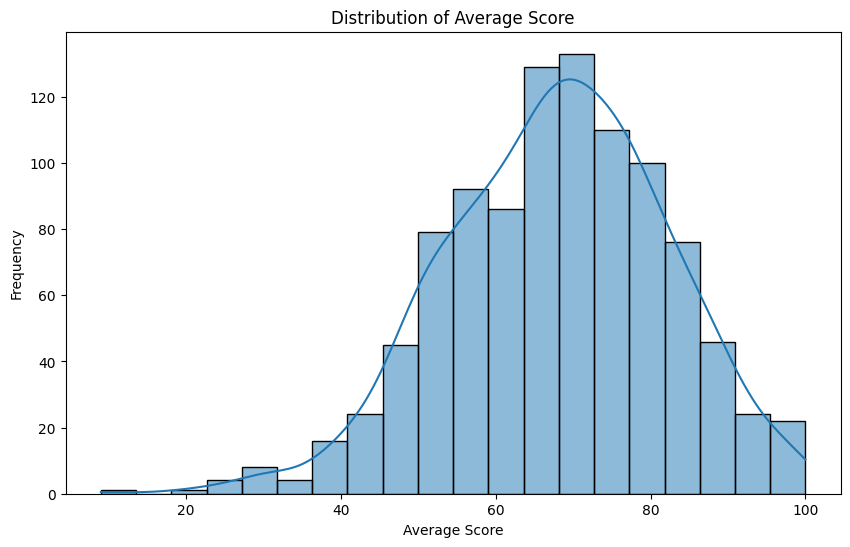

In [49]:
#  plot the distribution of the average score
plt.figure(figsize=(10, 6))
sns.histplot(data=df,x='average_score', bins=20, kde=True)
plt.title('Distribution of Average Score')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.show()

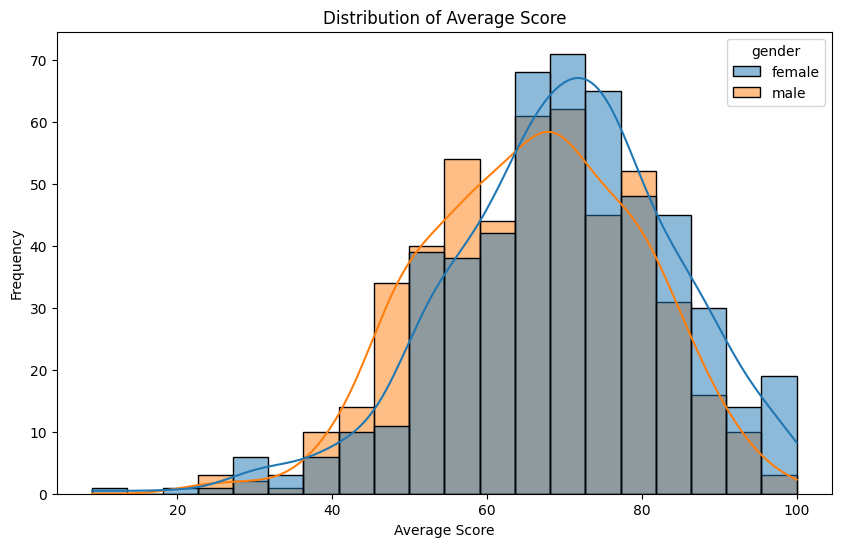

In [50]:
#  plot the distribution of the average score based on gender
plt.figure(figsize=(10, 6))
sns.histplot(data=df,x='average_score', bins=20, kde=True, hue='gender')
plt.title('Distribution of Average Score')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.show()